In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import os
os.getcwd()

'/Users/dc/test_stuff/regression'

In [6]:
births=pd.read_csv("/Users/dc/test_stuff/regression/BIRTH.csv")
witness = pd.read_csv("/Users/dc/test_stuff/regression/WITNESS.csv")
nlsy = pd.read_csv("/Users/dc/test_stuff/regression/NLSY.csv")


In [8]:
births.head()

,bfacil,mage,restatus,mrace,married,unmarried,meduc,fage,frace,feduc,...,gestation,gestrec10,gest_cat2,down_syn,sex,wic,bfed,cig_rec,bwt,bwt_pnds
0,1,21,1,1,0,1,3,19.0,1,2,...,39,7,2,2,1,2,2,1,108.150055,6.759378
1,1,19,1,4,1,0,2,20.0,4,3,...,37,6,2,2,2,2,2,1,113.405884,7.087868
2,1,19,1,3,0,1,3,22.0,7,3,...,35,5,1,2,1,2,1,1,105.645599,6.602850
3,1,21,1,2,1,0,3,23.0,2,4,...,30,3,1,2,2,1,1,1,17.002064,1.062629
4,1,23,2,1,0,1,3,26.0,1,3,...,39,7,2,2,1,2,2,1,131.007599,8.187975


In [18]:
witness.head()
acc = witness.loc[:,["ACCURATE"]]
other= witness.drop("ACCURATE",axis=1)
acc.corr(other)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [13]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

births.corr(method=histogram_intersection)

/var/folders/fq/80jq913s6551wcf2tpmpj3hh0000gn/T/ipykernel_75993/2458071893.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  births.corr(method=histogram_intersection)


,bfacil,mage,restatus,mrace,married,unmarried,meduc,fage,frace,feduc,...,gestation,gestrec10,gest_cat2,down_syn,sex,wic,bfed,cig_rec,bwt,bwt_pnds
bfacil,1.0,1225.0,1205.0,1205.0,715.0,485.0,1222.0,1075.0,1206.0,1223.0,...,1225.0,1225.0,1211.0,1213.0,1206.0,1200.0,1214.0,1200.0,1225.0,1224.1
mage,1225.0,1.0,1590.0,2279.0,715.0,485.0,5104.0,29561.0,4176.0,5716.0,...,33726.0,8414.0,2264.0,2427.0,1825.0,1727.0,2355.0,1295.0,33833.8,8665.0
restatus,1205.0,1590.0,1.0,1333.0,715.0,485.0,1580.0,1408.0,1358.0,1572.0,...,1590.0,1589.0,1515.0,1552.0,1384.0,1320.0,1482.0,1240.0,1590.0,1586.9
mrace,1205.0,2279.0,1333.0,1.0,715.0,485.0,2090.0,1975.0,2091.0,2106.0,...,2279.0,2271.0,1689.0,1771.0,1501.0,1538.0,1780.0,1221.0,2279.0,2267.0
married,715.0,715.0,715.0,715.0,1.0,0.0,715.0,708.0,715.0,715.0,...,715.0,715.0,715.0,715.0,715.0,715.0,715.0,715.0,715.0,714.9
unmarried,485.0,485.0,485.0,485.0,0.0,1.0,485.0,342.0,485.0,485.0,...,485.0,485.0,485.0,485.0,485.0,485.0,485.0,485.0,485.0,484.2
meduc,1222.0,5104.0,1580.0,2090.0,715.0,485.0,1.0,4628.0,2449.0,4451.0,...,5104.0,4973.0,2224.0,2360.0,1803.0,1695.0,2288.0,1295.0,5104.0,4988.7
fage,1075.0,29561.0,1408.0,1975.0,708.0,342.0,4628.0,1.0,2994.0,4381.0,...,32099.0,7390.0,1988.0,2114.0,1596.0,1462.0,2083.0,1120.0,32659.6,7633.1
frace,1206.0,4176.0,1358.0,2091.0,715.0,485.0,2449.0,2994.0,1.0,3150.0,...,4176.0,3832.0,1741.0,1829.0,1523.0,1582.0,1814.0,1241.0,4176.0,3892.2
feduc,1223.0,5716.0,1572.0,2106.0,715.0,485.0,4451.0,4381.0,3150.0,1.0,...,5716.0,5279.0,2221.0,2368.0,1797.0,1690.0,2288.0,1294.0,5716.0,5310.1


In [10]:
nlsy.head()

,R0000100,PCS2000,CESD2000Total,CESDTotal2000cutpt,MCS2000,RelAt2000cat6,RelAt2000cat2,Gender,Race3,Marital2000c5,Education2000,Education2000c4,NumberBioStepAdoptChildHH2000,BioChildHH2000c2,WorkTimeHrsperWkPastCalYr2000cat4,UnemplyWksPastCal2000c,UnemployedWksPastCal2000cont,IncomePercNetFam2000c,PovertyStatus2000c2
0,2833,NaN,0,2,NaN,2,1,2,3,4,12,3,3,1,1,4,0,1,1
1,3188,NaN,,,NaN,4,1,1,2,5,12,3,1,1,,4,0,1,1
2,5744,NaN,,,NaN,5,1,1,1,4,14,2,3,1,2,4,0,1,1
3,6260,NaN,,,NaN,1,1,2,2,4,13,2,1,1,2,4,0,1,1
4,8109,NaN,8,1,NaN,2,1,1,1,2,11,3,3,1,4,4,0,1,1


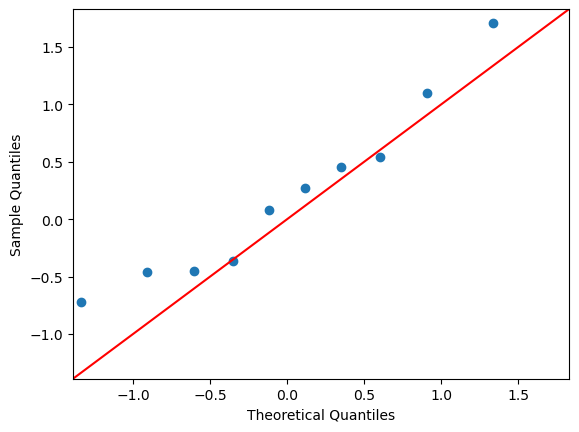

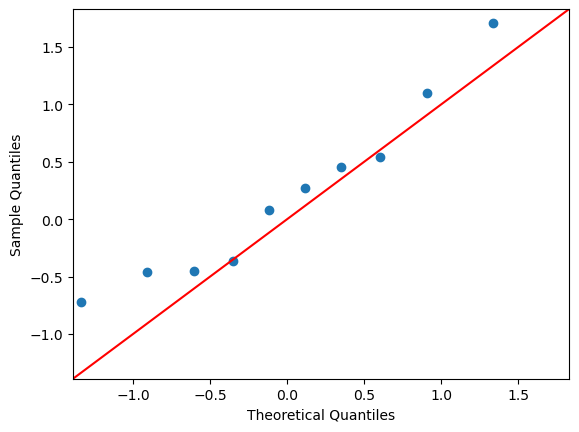

In [2]:
data_points = np.random.normal(0, 1, 10)    
  
sm.qqplot(data_points, line ='45')

ShapiroResult(statistic=0.9978703856468201, pvalue=0.23254017531871796)


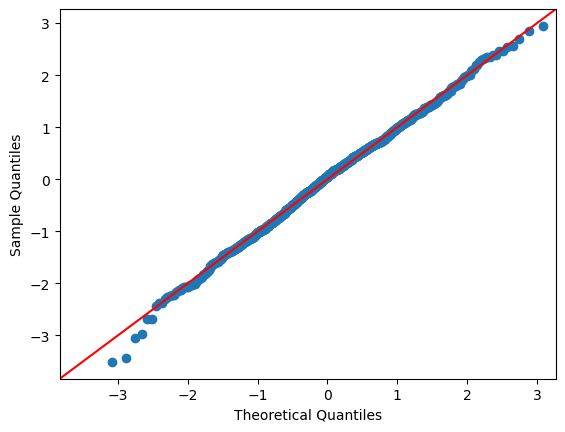

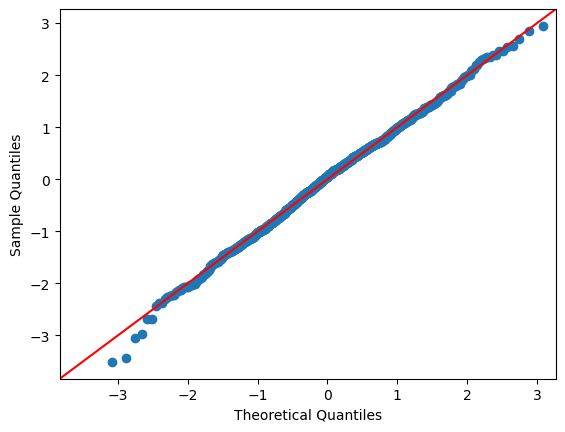

In [5]:
data_points = np.random.normal(0, 1, 1000)    
import scipy
from scipy.stats import shapiro
print(scipy.stats.shapiro(data_points))
#we do not have sufficient evidence the data does not come from a normal distribution 
sm.qqplot(data_points, line ='45')